In [5]:
import pandas as pd
pd.set_option('display.max_rows',20)

In [ ]:
datos = 0

FileNotFoundError: ignored

In [ ]:
datos['Tipo']

In [ ]:
tipo_de_inmueble = datos.Tipo

In [ ]:
tipo_de_inmueble.drop_duplicates(inplace=True)

In [ ]:
tipo_de_inmueble = pd.DataFrame(tipo_de_inmueble)

In [ ]:
index = range(tipo_de_inmueble.shape[0])

In [ ]:
tipo_de_inmueble.index = index
print(tipo_de_inmueble)

In [ ]:
tipo_de_inmueble.columns.name = 'Index'
tipo_de_inmueble

In [ ]:
habitacional = ['Habitación',
'Casa',
'Departamento',
'Casa en condominio',
'Casa comercial',
'Casa de villa',
'Chalet']
habitacional

In [ ]:
isn = datos['Tipo'].isin(habitacional)
isn

In [ ]:
seleccion_residencial = datos[isn]
seleccion_residencial

In [ ]:
seleccion_residencial.index = range(22846)
seleccion_residencial

In [ ]:
seleccion_residencial.to_csv('alquiler_residencial.csv', sep = ';', index = False)
seleccion_residencial

In [ ]:
datos_residenciales = pd.read_csv('alquiler_residencial.csv', sep=';')
datos_residenciales

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0
1,Casa,Lurigancho,2,0,1,100,7000.0,NaN,NaN
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0
3,Departamento,Ate,1,0,0,48,800.0,230.0,NaN
4,Departamento,Barranco,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22841,Departamento,Santa Anita,2,0,0,70,900.0,490.0,48.0
22842,Habitación,Pachacámac,0,0,0,27,800.0,350.0,25.0
22843,Departamento,Lince,3,1,2,78,1800.0,800.0,40.0
22844,Departamento,Rímac,2,1,0,48,1400.0,509.0,37.0


# Encargos jefe

Seleccione solo Tipo Departamento

In [ ]:
encargo_1 = datos['Tipo'] == 'Departamento'
encargo_1 = datos[encargo_1]
encargo_1.index = range(19532)
encargo_1

NameError: ignored

Seleccione las tipo Casa, Casa en condominio y Casa de Villa



In [ ]:
encargo_2 = (datos['Tipo'] == 'Casa') | (datos['Tipo'] == 'Casa en condominio') | (datos['Tipo'] == 'Casa de Villa')
encargo_2 = datos[encargo_2]
encargo_2.index = range(encargo_2.shape[0])
encargo_2

Seleccione inmuebles con área entre 60 y 100 metros cuadrados (incluyendo limites)

In [ ]:
encargo_3 = (datos['Area']>=60) & (datos['Area']<=100)
encargo_3 = datos[encargo_3]
encargo_3.index = range(encargo_3.shape[0])
encargo_3

Seleccione los inmuebles con minimo 4 cuartos pero valga su alquiler menos de $2.000



In [ ]:
encargo_4 = (datos['Cuartos']>3) & (datos['Valor']<2000)
encargo_4 = datos[encargo_4]
encargo_4.index = range(43)
encargo_4

In [ ]:
print('DataFrame solo con inmuebles Tipo Departamento: \n{}'.format(encargo_1))
print('DataFrame solo con inmuebles Tipo Casa, Casa en condominio y Casa de Villa: \n{}'.format(encargo_2))
print('DataFrame con inmuebles de área entre 60 y 100 metros cuadrados (incluyendo limites): \n{}'.format(encargo_3))
print('DataFrame con inmuebles de minimo 4 cuartos con alquiler de valor menor a $2.000: \n{}'.format(encargo_4))


# Tratando Valores Nulos

In [ ]:
datos_residenciales.head(1000)

In [ ]:
datos_residenciales.notnull().isnull() #jajaja

In [ ]:
datos_residenciales.info()

In [ ]:
datos_residenciales[datos_residenciales['Valor'].isnull()]

In [ ]:
datos_residenciales.dropna(subset = ['Valor'], inplace = True)
datos_residenciales[datos_residenciales['Valor'].isnull()] 

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto


In [ ]:
datos_residenciales[datos_residenciales['Mantenimiento'].isnull()].shape[0]

2047

In [ ]:
seleccion = (datos_residenciales['Mantenimiento'].isnull()) & (datos_residenciales['Tipo'] == 'Departamento')
seleccion.head(20)

0     False
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8      True
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
dtype: bool

In [ ]:
datos_residenciales = datos_residenciales[~seleccion]
~seleccion

0         True
1         True
2         True
3         True
4        False
         ...  
22841     True
22842     True
22843     True
22844     True
22845     True
Length: 22837, dtype: bool

In [ ]:
datos_residenciales = datos_residenciales.fillna({'Mantenimiento':0.0,'Impuesto':0.0})

In [ ]:
datos_residenciales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22092 entries, 0 to 22845
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           22092 non-null  object 
 1   Distrito       22092 non-null  object 
 2   Cuartos        22092 non-null  int64  
 3   Vacantes       22092 non-null  int64  
 4   Suites         22092 non-null  int64  
 5   Area           22092 non-null  int64  
 6   Valor          22092 non-null  float64
 7   Mantenimiento  22092 non-null  float64
 8   Impuesto       22092 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


In [ ]:
datos_residenciales.to_csv('alquiler_residencial.csv', sep=';', index =False)

# Análisis IV

In [ ]:
datos_residenciales['Precio Bruto'] = (datos_residenciales['Valor']) + (datos_residenciales['Impuesto']) + (datos_residenciales['Mantenimiento'])
datos_residenciales.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Precio Bruto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,1210.0
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,1030.0
5,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,1618.0
6,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0,22000.0
7,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0,1000.0
9,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0,2216.0
10,Departamento,San Borja,3,1,1,90,1500.0,455.0,14.0,1969.0
11,Departamento,San Borja,1,0,1,40,2000.0,561.0,50.0,2611.0


In [ ]:
datos_residenciales['Valor m2'] = ((datos_residenciales['Valor']) / (datos_residenciales['Area'])).round(2)
datos_residenciales

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Precio Bruto,Valor m2
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,1210.0,53.33
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,1030.0,16.67
5,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00
...,...,...,...,...,...,...,...,...,...,...,...
22841,Departamento,Santa Anita,2,0,0,70,900.0,490.0,48.0,1438.0,12.86
22842,Habitación,Pachacámac,0,0,0,27,800.0,350.0,25.0,1175.0,29.63
22843,Departamento,Lince,3,1,2,78,1800.0,800.0,40.0,2640.0,23.08
22844,Departamento,Rímac,2,1,0,48,1400.0,509.0,37.0,1946.0,29.17


In [ ]:
datos_residenciales['Valor bruto m2'] = ((datos_residenciales['Precio Bruto'])/(datos_residenciales['Area'])).round(2)
datos_residenciales.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Precio Bruto,Valor m2,Valor bruto m2
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46
5,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36
6,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33,29.33
7,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38,15.38
9,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43,31.66
10,Departamento,San Borja,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67,21.88
11,Departamento,San Borja,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00,65.28


In [ ]:
casa = ['Casa', 'Casa en condominio', 'Casa de villa']
datos_residenciales['Tipo agrupado'] = datos_residenciales['Tipo'].apply(lambda x: 'Casa' if x in casa else 'Departamento')
datos_residenciales

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Precio Bruto,Valor m2,Valor bruto m2,Tipo agrupado
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00,Casa
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Departamento
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46,Departamento
5,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36,Departamento
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22841,Departamento,Santa Anita,2,0,0,70,900.0,490.0,48.0,1438.0,12.86,20.54,Departamento
22842,Habitación,Pachacámac,0,0,0,27,800.0,350.0,25.0,1175.0,29.63,43.52,Departamento
22843,Departamento,Lince,3,1,2,78,1800.0,800.0,40.0,2640.0,23.08,33.85,Departamento
22844,Departamento,Rímac,2,1,0,48,1400.0,509.0,37.0,1946.0,29.17,40.54,Departamento


#           Excluyendo Variables

In [ ]:
data = datos_residenciales
del datos_residenciales
data.head()

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Precio Bruto,Valor m2,Valor bruto m2,Tipo agrupado
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00,Casa
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Departamento
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46,Departamento
5,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36,Departamento


In [ ]:
data.pop('Precio Bruto')
data

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Valor bruto m2,Tipo agrupado
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,42.50,56.50,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,70.00,70.00,Casa
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,53.33,80.67,Departamento
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,16.67,21.46,Departamento
5,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,26.00,32.36,Departamento
...,...,...,...,...,...,...,...,...,...,...,...,...
22841,Departamento,Santa Anita,2,0,0,70,900.0,490.0,48.0,12.86,20.54,Departamento
22842,Habitación,Pachacámac,0,0,0,27,800.0,350.0,25.0,29.63,43.52,Departamento
22843,Departamento,Lince,3,1,2,78,1800.0,800.0,40.0,23.08,33.85,Departamento
22844,Departamento,Rímac,2,1,0,48,1400.0,509.0,37.0,29.17,40.54,Departamento


In [ ]:
data.drop('Valor bruto m2', axis = 1, inplace = True)

#NUEVO NOTEBOOK ;)

In [1]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(14,6))

In [8]:
datos = pd.read_csv('alquiler_residencial.csv', sep = ';')

In [9]:
Q1 = datos['Valor'].quantile(.25)
Q1

1600.0

In [10]:
Q3 = datos['Valor'].quantile(.75)
Q3

5500.0

In [11]:
IIQ = Q3-Q1
IIQ

3900.0

In [12]:
limite_sup = Q3 + 1.5 * IIQ
limite_sup

11350.0

In [13]:
limite_inf = IIQ - 1.5 * IIQ
limite_inf

-1950.0

In [14]:
seleccion = (datos['Valor'] <= limite_sup) & (datos['Valor'] >= limite_inf)
seleccion

0        True
1        True
2        True
3        True
4        True
         ... 
22087    True
22088    True
22089    True
22090    True
22091    True
Name: Valor, Length: 22092, dtype: bool

<Axes: >

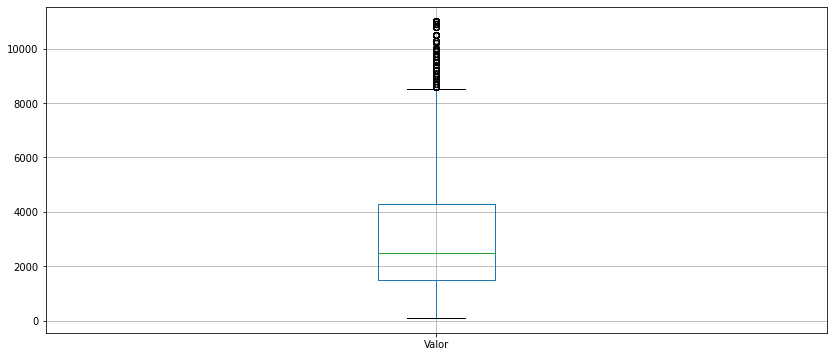

In [15]:
datos_new = datos[seleccion]
datos_new.boxplot(['Valor'])

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

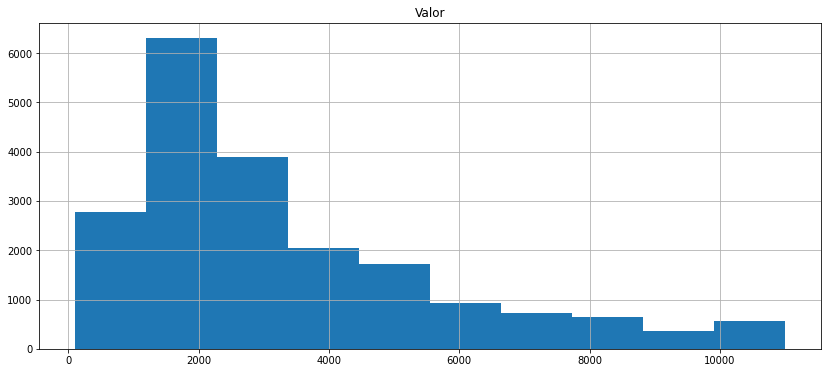

In [16]:
datos_new.hist('Valor')

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

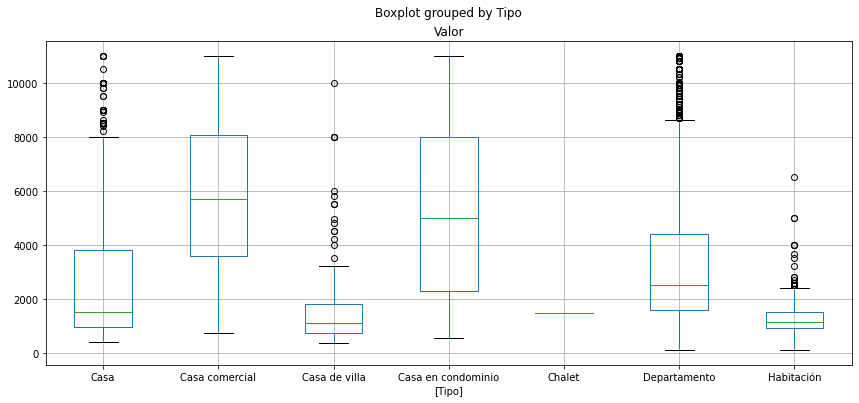

In [17]:
datos_new.boxplot(['Valor'], by=['Tipo'])

In [18]:
print(datos[datos.Tipo == 'Chalet'])

        Tipo Distrito  Cuartos  Vacantes  Suites  Area   Valor  Mantenimiento  \
3132  Chalet      Ate       23         0      23   862  1480.0          295.0   

      Impuesto  
3132       0.0  


In [27]:
datos['Tipo'][3132] = 'Casa'

<ipython-input-27-5562eee0fb26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Tipo'][3132] = 'Casa'


In [28]:
datos['Tipo'][3132]

'Casa'

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

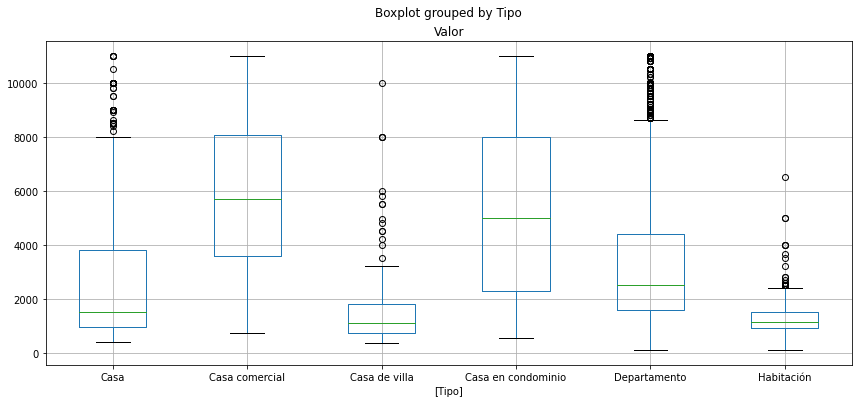

In [32]:
datos_new = datos[seleccion]
datos_new.boxplot(['Valor'], by=['Tipo'])

In [30]:
print(datos[datos.Tipo == 'Chalet'])

Empty DataFrame
Columns: [Tipo, Distrito, Cuartos, Vacantes, Suites, Area, Valor, Mantenimiento, Impuesto]
Index: []


In [33]:
datos_new.groupby('Tipo')['Valor'].groups

{'Casa': [1, 54, 97, 101, 146, 162, 182, 241, 253, 256, 267, 289, 313, 382, 389, 403, 428, 438, 479, 480, 486, 548, 549, 574, 580, 626, 639, 644, 645, 670, 710, 734, 792, 869, 886, 1046, 1053, 1141, 1143, 1175, 1196, 1268, 1275, 1355, 1370, 1391, 1434, 1448, 1463, 1468, 1495, 1498, 1511, 1611, 1629, 1681, 1687, 1696, 1709, 1734, 1742, 1787, 1836, 1861, 1901, 1931, 1959, 1968, 1987, 2046, 2066, 2102, 2134, 2160, 2198, 2239, 2278, 2310, 2329, 2406, 2414, 2463, 2465, 2495, 2499, 2551, 2596, 2679, 2701, 2783, 2790, 2800, 2950, 2954, 2961, 2986, 2999, 3082, 3113, 3132, ...], 'Casa comercial': [58, 454, 565, 578, 649, 768, 910, 912, 975, 1061, 1317, 1401, 1423, 1457, 1536, 1790, 2194, 2549, 2626, 2696, 2832, 2979, 3147, 3160, 3379, 3935, 3995, 4039, 4511, 4819, 4981, 5070, 5125, 5273, 5674, 5749, 5959, 6045, 6053, 6456, 6535, 6536, 6556, 6822, 7211, 7473, 8114, 8181, 8363, 8390, 8422, 8701, 8731, 9150, 9254, 9391, 9592, 9628, 9865, 9891, 9908, 9935, 10157, 10265, 10654, 10692, 10767, 10841, 

In [34]:
datos_new.to_csv('alquiler_residencial_nuevo.csv',sep=';')